<a href="https://colab.research.google.com/github/BelalMJ/BelalMJ_64061/blob/Assignment-2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BA64061 - Assignment 2: Convolution

## Firstly we need to mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Required Libraries

In [ ]:
import os
import pathlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, Input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##Define Dataset Paths

In [ ]:
# Define the base directory for the dataset
new_base_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")

# Define paths to the dataset
train_dir = new_base_dir / "train"  # Training data
validation_dir = new_base_dir / "validation"  # Validation data
test_dir = new_base_dir / "test"  # Test data

Define dataset sizes
train_sizes = [500, 1000, 1500, 2000, 2500]  # Train different samples for later comparison
validation_size = 500
test_size = 500

##Define Model Creation Functions

In [ ]:
# Custom CNN Model
def create_model():
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
    return model

# Pretrained VGG16 Model
def create_pretrained_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False
    model = keras.Sequential([
        base_model,
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
    return model

##Set Up Data Generators

In [ ]:
# Data augmentation for training and rescaling for validation/testing
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=40, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load training, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=True
)
validation_generator = val_test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1007 images belonging to 2 classes.


##Train and evaluate a model with early stopping and learning rate reduction

In [ ]:
def train_and_evaluate(model, train_generator, validation_generator, test_generator, train_size, epochs=10):
    steps_per_epoch = train_size // 32
    validation_steps = validation_size // 32

    # Callbacks for early stopping and learning rate reduction
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
    ]

    print(f"\nTraining with {train_size} samples...")
    history = model.fit(
        train_generator, epochs=epochs, validation_data=validation_generator,
        steps_per_epoch=steps_per_epoch, validation_steps=validation_steps,
        callbacks=callbacks, verbose=1
    )

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_generator, verbose=1)

    # Print metrics
    print(f"Train Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Training Loss: {history.history['loss'][-1]:.4f}")
    print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
    print(f"Test Accuracy for {train_size} samples: {test_acc:.4f}")

    # Return results and history for plotting
    return {
        'train_size': train_size,
        'train_acc': history.history['accuracy'][-1],
        'train_loss': history.history['loss'][-1],
        'val_acc': history.history['val_accuracy'][-1],
        'val_loss': history.history['val_loss'][-1],
        'test_acc': test_acc
    }, history

##Training Models from scratch with Different Sample Sizes

In [ ]:
def train_and_evaluate(model, train_generator, validation_generator, test_generator, train_size, epochs=10):
    steps_per_epoch = train_size // 32
    validation_steps = validation_size // 32

    # Callbacks for early stopping and learning rate reduction
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
    ]

    print(f"\nTraining with {train_size} samples...")
    history = model.fit(
        train_generator, epochs=epochs, validation_data=validation_generator,
        steps_per_epoch=steps_per_epoch, validation_steps=validation_steps,
        callbacks=callbacks, verbose=1
    )

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_generator, verbose=1)

    # Print metrics
    print(f"Train Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Training Loss: {history.history['loss'][-1]:.4f}")
    print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
    print(f"Test Accuracy for {train_size} samples: {test_acc:.4f}")

    # Return results and history for plotting
    return {
        'train_size': train_size,
        'train_acc': history.history['accuracy'][-1],
        'train_loss': history.history['loss'][-1],
        'val_acc': history.history['val_accuracy'][-1],
        'val_loss': history.history['val_loss'][-1],
        'test_acc': test_acc
    }, history


scratch_results = []
train_size = 500  # Train for question 3

# Train and evaluate the scratch model
results, history = train_and_evaluate(create_model(), train_generator, validation_generator, test_generator, train_size)
scratch_results.append(results)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with 500 samples...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.4632 - loss: 1.8559 - val_accuracy: 0.5042 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.5474 - loss: 0.6923 - val_accuracy: 0.4979 - val_loss: 0.6949 - learning_rate: 0.0010
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.5403 - loss: 0.6853 - val_accuracy: 0.5083 - val_loss: 0.6973 - learning_rate: 0.0010
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.5312 - loss: 0.6914 - val_accuracy: 0.4875 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 5/10
 3/15 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5330 - loss: 0.6935

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 956ms/step - accuracy: 0.5483 - loss: 0.6896 - val_accuracy: 0.5063 - val_loss: 0.6895 - learning_rate: 0.0010
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5130 - loss: 0.6912 - val_accuracy: 0.4708 - val_loss: 0.6954 - learning_rate: 0.0010
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5138 - loss: 0.6942 - val_accuracy: 0.5542 - val_loss: 0.6878 - learning_rate: 0.0010
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.5730 - loss: 0.6872 - val_accuracy: 0.5604 - val_loss: 0.6827 - learning_rate: 0.0010
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.5415 - loss: 0.6954 - val_accuracy: 0.5208 - val_loss: 0.6811 - learning_rate: 0.0010
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5111 - loss: 0.6887 - val_accuracy: 0.4958 - val_loss: 0.6849 - learning_rate: 0.0010
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 585ms/step - accuracy: 0.4865 - loss: 0.6861
Train Accuracy: 0.5104
Training

In [ ]:
scratch_results = []
train_size = 1000  # Train for question 1

# Train and evaluate the scratch model
results, history = train_and_evaluate(create_model(), train_generator, validation_generator, test_generator, train_size)
scratch_results.append(results)


Training with 1000 samples...
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.4966 - loss: 0.9303 - val_accuracy: 0.4979 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.5269 - loss: 0.6916 - val_accuracy: 0.6208 - val_loss: 0.6824 - learning_rate: 0.0010
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 587ms/step - accuracy: 0.4688 - loss: 0.6910 - val_accuracy: 0.5854 - val_loss: 0.6839 - learning_rate: 0.0010
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.5546 - loss: 0.6883 - val_accuracy: 0.5458 - val_loss: 0.6821 - learning_rate: 0.0010
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.5847 - loss: 0.6763 - val_accuracy: 0.6271 - val_loss: 0.6622 - learning_rate: 0.0010
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 340ms/step - accuracy: 0.7500 - loss: 0.6410 - val_accuracy: 0.6146 - val_loss: 0.6633 - learning_rate: 0.0010
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 

In [ ]:
scratch_results = []
train_size = 1500  # Train for question 2

# Train and evaluate the scratch model
results, history = train_and_evaluate(create_model(), train_generator, validation_generator, test_generator, train_size)
scratch_results.append(results)


Training with 1500 samples...
Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.4981 - loss: 1.0291 - val_accuracy: 0.5104 - val_loss: 0.6930 - learning_rate: 0.0010
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 46s 965ms/step - accuracy: 0.5117 - loss: 0.6925 - val_accuracy: 0.5271 - val_loss: 0.6900 - learning_rate: 0.0010
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.4933 - loss: 0.6940 - val_accuracy: 0.5167 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5271 - loss: 0.6920 - val_accuracy: 0.5063 - val_loss: 0.6894 - learning_rate: 0.0010
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.4993 - loss: 0.6974 - val_accuracy: 0.4875 - val_loss: 0.6816 - learning_rate: 0.0010
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5106 - loss: 0.6871 - val_accuracy: 0.4812 - val_loss: 0.6877 - learning_rate: 0.0010
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 

In [ ]:
scratch_results = []
train_size = 2000  # Train for question 3

# Train and evaluate the scratch model
results, history = train_and_evaluate(create_model(), train_generator, validation_generator, test_generator, train_size)
scratch_results.append(results)


Training with 2000 samples...
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.4920 - loss: 0.9034 - val_accuracy: 0.5104 - val_loss: 0.6995 - learning_rate: 0.0010
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - accuracy: 0.4688 - loss: 0.7030 - val_accuracy: 0.4708 - val_loss: 0.6967 - learning_rate: 0.0010
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.5185 - loss: 0.6942 - val_accuracy: 0.5250 - val_loss: 0.6927 - learning_rate: 0.0010
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 318ms/step - accuracy: 0.3750 - loss: 0.6942 - val_accuracy: 0.5250 - val_loss: 0.6927 - learning_rate: 0.0010
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.4963 - loss: 0.6933 - val_accuracy: 0.5229 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - accuracy: 0.3438 - loss: 0.6957 - val_accuracy: 0.5437 - val_loss: 0.6922 - learning_rate: 0.0010
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accu

In [ ]:
scratch_results = []
train_size = 2500 # Train for question 3

# Train and evaluate the scratch model
results, history = train_and_evaluate(create_model(), train_generator, validation_generator, test_generator, train_size)
scratch_results.append(results)


Training with 2500 samples...
Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.5215 - loss: 0.9311 - val_accuracy: 0.4979 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.5094 - loss: 0.6931 - val_accuracy: 0.5417 - val_loss: 0.6941 - learning_rate: 0.0010
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.5194 - loss: 0.6914 - val_accuracy: 0.5063 - val_loss: 0.6923 - learning_rate: 0.0010
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.5040 - loss: 0.6957 - val_accuracy: 0.5104 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.5243 - loss: 0.6900 - val_accuracy: 0.5437 - val_loss: 0.6840 - learning_rate: 0.0010
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.5526 - loss: 0.6811 - val_accuracy: 0.5729 - val_loss: 0.6724 - learning_rate: 0.0010
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 

##Training Models using pretrined VGG16 with Different Sample Sizes

In [ ]:
# Train from pretrained
pretrained_results = []
train_size = 500  # Train for question 4, repeat question 3 sample

# Train and evaluate the pretrained model
results, history = train_and_evaluate(create_pretrained_model(), train_generator, validation_generator, test_generator, train_size)
pretrained_results.append(results)


Training with 500 samples...
Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 265s 18s/step - accuracy: 0.4903 - loss: 2.6681 - val_accuracy: 0.7125 - val_loss: 0.5565 - learning_rate: 0.0010
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 321s 22s/step - accuracy: 0.6120 - loss: 0.7728 - val_accuracy: 0.8021 - val_loss: 0.4566 - learning_rate: 0.0010
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 261s 18s/step - accuracy: 0.7237 - loss: 0.5564 - val_accuracy: 0.8521 - val_loss: 0.3819 - learning_rate: 0.0010
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 261s 18s/step - accuracy: 0.7843 - loss: 0.4842 - val_accuracy: 0.8542 - val_loss: 0.3565 - learning_rate: 0.0010
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 203s 14s/step - accuracy: 0.7760 - loss: 0.4550 - val_accuracy: 0.8771 - val_loss: 0.3305 - learning_rate: 0.0010
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 322s 20s/step - accuracy: 0.7865 - loss: 0.4320 - val_accuracy: 0.8750 - val_loss: 0.3253 - learning_rate: 0.0010
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 322s 22s/step - accu

In [ ]:
# Train from pretrained
pretrained_results = []
train_size = 1000  # Train for question 4, repeat question 1 sample

# Train and evaluate the pretrained model
results, history = train_and_evaluate(create_pretrained_model(), train_generator, validation_generator, test_generator, train_size)
pretrained_results.append(results)


Training with 1000 samples...
Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 407s 13s/step - accuracy: 0.5958 - loss: 1.3655 - val_accuracy: 0.8542 - val_loss: 0.3549 - learning_rate: 0.0010
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 440s 14s/step - accuracy: 0.7469 - loss: 0.4966 - val_accuracy: 0.8562 - val_loss: 0.3354 - learning_rate: 0.0010
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.8750 - loss: 0.2887 - val_accuracy: 0.8687 - val_loss: 0.3290 - learning_rate: 0.0010
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 452s 13s/step - accuracy: 0.8139 - loss: 0.4168 - val_accuracy: 0.8875 - val_loss: 0.2800 - learning_rate: 0.0010
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 442s 14s/step - accuracy: 0.8265 - loss: 0.3907 - val_accuracy: 0.8625 - val_loss: 0.2968 - learning_rate: 0.0010
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.7812 - loss: 0.4049 - val_accuracy: 0.8854 - val_loss: 0.2697 - learning_rate: 0.0010
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 460s 13s/step - accur

In [ ]:
# Train from pretrained
pretrained_results = []
train_size = 1500  # Train for question 4, repeat question 2 sample

# Train and evaluate the pretrained model
results, history = train_and_evaluate(create_pretrained_model(), train_generator, validation_generator, test_generator, train_size)
pretrained_results.append(results)


Training with 1500 samples...
Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 541s 12s/step - accuracy: 0.5908 - loss: 1.4829 - val_accuracy: 0.8750 - val_loss: 0.3111 - learning_rate: 0.0010
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 322s 7s/step - accuracy: 0.7518 - loss: 0.4824 - val_accuracy: 0.8125 - val_loss: 0.3832 - learning_rate: 0.0010
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 533s 12s/step - accuracy: 0.7772 - loss: 0.4338 - val_accuracy: 0.8479 - val_loss: 0.3188 - learning_rate: 0.0010
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 322s 7s/step - accuracy: 0.8187 - loss: 0.4125 - val_accuracy: 0.8771 - val_loss: 0.2851 - learning_rate: 0.0010
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 560s 12s/step - accuracy: 0.8097 - loss: 0.3993 - val_accuracy: 0.8583 - val_loss: 0.3117 - learning_rate: 0.0010
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 323s 7s/step - accuracy: 0.8482 - loss: 0.3612 - val_accuracy: 0.8729 - val_loss: 0.2867 - learning_rate: 0.0010
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 567s 12s/step - accura

In [ ]:
# Train from pretrained
pretrained_results = []
train_size = 2000  # Train for question 4, repeat question 3 sample

# Train and evaluate the pretrained model
results, history = train_and_evaluate(create_pretrained_model(), train_generator, validation_generator, test_generator, train_size)
pretrained_results.append(results)


Training with 2000 samples...
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 681s 11s/step - accuracy: 0.6406 - loss: 1.0396 - val_accuracy: 0.8771 - val_loss: 0.2999 - learning_rate: 0.0010
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.7500 - loss: 0.4985 - val_accuracy: 0.8333 - val_loss: 0.3518 - learning_rate: 0.0010
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 741s 11s/step - accuracy: 0.7912 - loss: 0.4511 - val_accuracy: 0.8250 - val_loss: 0.3561 - learning_rate: 0.0010
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8438 - loss: 0.3851 - val_accuracy: 0.8687 - val_loss: 0.2854 - learning_rate: 0.0010
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 741s 12s/step - accuracy: 0.7980 - loss: 0.4112 - val_accuracy: 0.8750 - val_loss: 0.2948 - learning_rate: 0.0010
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8125 - loss: 0.3375 - val_accuracy: 0.8958 - val_loss: 0.2714 - learning_rate: 0.0010
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 675s 11s/step - accura

In [ ]:
# Train from pretrained
pretrained_results = []
train_size = 2500  # Train for question 4, repeat question 3 sample

# Train and evaluate the pretrained model
results, history = train_and_evaluate(create_pretrained_model(), train_generator, validation_generator, test_generator, train_size)
pretrained_results.append(results)


Training with 2500 samples...
Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 687s 9s/step - accuracy: 0.6284 - loss: 1.0277 - val_accuracy: 0.8625 - val_loss: 0.3094 - learning_rate: 0.0010
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 740s 9s/step - accuracy: 0.8130 - loss: 0.4121 - val_accuracy: 0.8979 - val_loss: 0.2617 - learning_rate: 0.0010
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 682s 9s/step - accuracy: 0.8190 - loss: 0.3881 - val_accuracy: 0.8938 - val_loss: 0.2643 - learning_rate: 0.0010
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 742s 9s/step - accuracy: 0.8281 - loss: 0.3790 - val_accuracy: 0.8562 - val_loss: 0.3022 - learning_rate: 0.0010
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 677s 9s/step - accuracy: 0.8443 - loss: 0.3716 - val_accuracy: 0.8958 - val_loss: 0.2718 - learning_rate: 0.0010
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 684s 9s/step - accuracy: 0.8538 - loss: 0.3328 - val_accuracy: 0.9000 - val_loss: 0.2450 - learning_rate: 2.0000e-04
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 681s 9s/step - accura

##Evaluating the model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(test_generator.classes, y_pred))
print(confusion_matrix(test_generator.classes, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 598ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.50      1.00      0.67       507

    accuracy                           0.50      1007
   macro avg       0.25      0.50      0.33      1007
weighted avg       0.25      0.50      0.34      1007

[[  0 500]
 [  0 507]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Comparison table for results from scratch

In [ ]:
import pandas as pd

# Define the scratch_results list
scratch_results = [
    {'train_size': 500, 'train_acc': 0.5104, 'train_loss': 0.6871, 'val_acc': 0.4958, 'val_loss': 0.6849, 'test_acc': 0.5005},
    {'train_size': 1000, 'train_acc': 0.5696, 'train_loss': 0.6779, 'val_acc': 0.6396, 'val_loss': 0.6462, 'test_acc': 0.5700},
    {'train_size': 1500, 'train_acc': 0.5533, 'train_loss': 0.6804, 'val_acc': 0.5521, 'val_loss': 0.6822, 'test_acc': 0.5482},
    {'train_size': 2000, 'train_acc': 0.6875, 'train_loss': 0.6692, 'val_acc': 0.5500, 'val_loss': 0.6847, 'test_acc': 0.5511},
    {'train_size': 2500, 'train_acc': 0.5890, 'train_loss': 0.6673, 'val_acc': 0.5813, 'val_loss': 0.6563, 'test_acc': 0.5879}
]

# Convert the list to a DataFrame
scratch_df = pd.DataFrame(scratch_results)

# Display the table
print("From-Scratch Model Results:")
print(scratch_df)

From-Scratch Model Results:
   train_size  train_acc  train_loss  val_acc  val_loss  test_acc
0         500     0.5104      0.6871   0.4958    0.6849    0.5005
1        1000     0.5696      0.6779   0.6396    0.6462    0.5700
2        1500     0.5533      0.6804   0.5521    0.6822    0.5482
3        2000     0.6875      0.6692   0.5500    0.6847    0.5511
4        2500     0.5890      0.6673   0.5813    0.6563    0.5879


##Comparison table for pretrained results

In [ ]:
import pandas as pd

# Define the pretrained_results list
pretrained_results = [
    {'train_size': 500, 'train_acc': 0.8958, 'train_loss': 0.3109, 'val_acc': 0.8875, 'val_loss': 0.2804, 'test_acc': 0.8729},
    {'train_size': 1000, 'train_acc': 0.8012, 'train_loss': 0.4236, 'val_acc': 0.8729, 'val_loss': 0.2876, 'test_acc': 0.8640},
    {'train_size': 1500, 'train_acc': 0.8409, 'train_loss': 0.3677, 'val_acc': 0.8875, 'val_loss': 0.2440, 'test_acc': 0.8878},
    {'train_size': 2000, 'train_acc': 0.9062, 'train_loss': 0.2866, 'val_acc': 0.9042, 'val_loss': 0.2441, 'test_acc': 0.8888},
    {'train_size': 2500, 'train_acc': 0.8635, 'train_loss': 0.3075, 'val_acc': 0.8917, 'val_loss': 0.2368, 'test_acc': 0.8878}
]

# Convert the list to a DataFrame
pretrained_df = pd.DataFrame(pretrained_results)

# Display the table
print("Pretrained Model Results:")
print(pretrained_df)

Pretrained Model Results:
   train_size  train_acc  train_loss  val_acc  val_loss  test_acc
0         500     0.8958      0.3109   0.8875    0.2804    0.8729
1        1000     0.8012      0.4236   0.8729    0.2876    0.8640
2        1500     0.8409      0.3677   0.8875    0.2440    0.8878
3        2000     0.9062      0.2866   0.9042    0.2441    0.8888
4        2500     0.8635      0.3075   0.8917    0.2368    0.8878


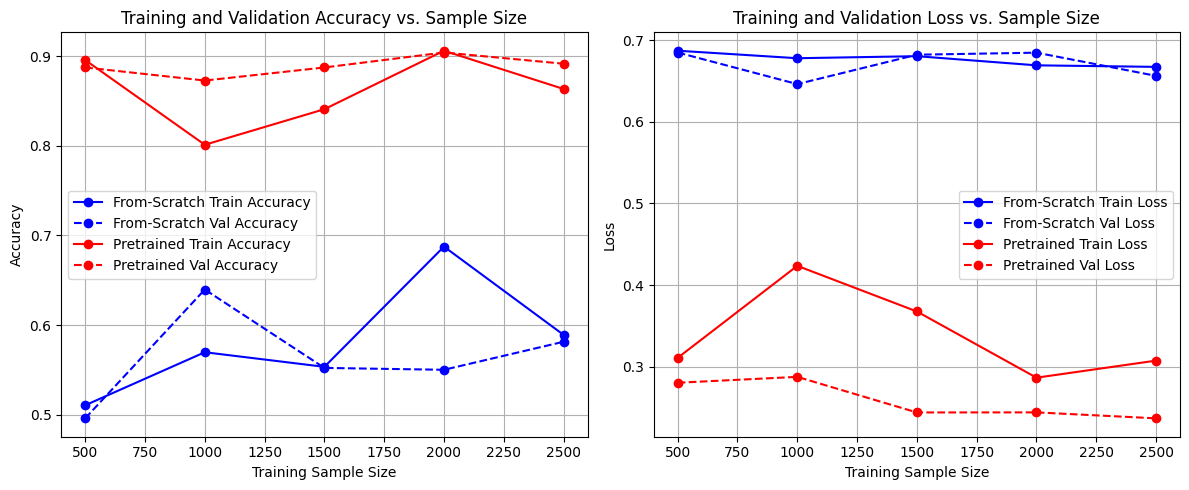

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# From-Scratch Model Results
scratch_results = [
    {'train_size': 500, 'train_acc': 0.5104, 'train_loss': 0.6871, 'val_acc': 0.4958, 'val_loss': 0.6849},
    {'train_size': 1000, 'train_acc': 0.5696, 'train_loss': 0.6779, 'val_acc': 0.6396, 'val_loss': 0.6462},
    {'train_size': 1500, 'train_acc': 0.5533, 'train_loss': 0.6804, 'val_acc': 0.5521, 'val_loss': 0.6822},
    {'train_size': 2000, 'train_acc': 0.6875, 'train_loss': 0.6692, 'val_acc': 0.5500, 'val_loss': 0.6847},
    {'train_size': 2500, 'train_acc': 0.5890, 'train_loss': 0.6673, 'val_acc': 0.5813, 'val_loss': 0.6563}
]

# Pretrained Model Results
pretrained_results = [
    {'train_size': 500, 'train_acc': 0.8958, 'train_loss': 0.3109, 'val_acc': 0.8875, 'val_loss': 0.2804},
    {'train_size': 1000, 'train_acc': 0.8012, 'train_loss': 0.4236, 'val_acc': 0.8729, 'val_loss': 0.2876},
    {'train_size': 1500, 'train_acc': 0.8409, 'train_loss': 0.3677, 'val_acc': 0.8875, 'val_loss': 0.2440},
    {'train_size': 2000, 'train_acc': 0.9062, 'train_loss': 0.2866, 'val_acc': 0.9042, 'val_loss': 0.2441},
    {'train_size': 2500, 'train_acc': 0.8635, 'train_loss': 0.3075, 'val_acc': 0.8917, 'val_loss': 0.2368}
]

# Convert results to DataFrames
scratch_df = pd.DataFrame(scratch_results)
pretrained_df = pd.DataFrame(pretrained_results)

# Plot 1: Training and Validation Accuracy vs. Sample Size
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# From-Scratch Model
plt.plot(scratch_df['train_size'], scratch_df['train_acc'], 'b-o', label='From-Scratch Train Accuracy')
plt.plot(scratch_df['train_size'], scratch_df['val_acc'], 'b--o', label='From-Scratch Val Accuracy')

# Pretrained Model
plt.plot(pretrained_df['train_size'], pretrained_df['train_acc'], 'r-o', label='Pretrained Train Accuracy')
plt.plot(pretrained_df['train_size'], pretrained_df['val_acc'], 'r--o', label='Pretrained Val Accuracy')

plt.title('Training and Validation Accuracy vs. Sample Size')
plt.xlabel('Training Sample Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot 2: Training and Validation Loss vs. Sample Size
plt.subplot(1, 2, 2)

# From-Scratch Model
plt.plot(scratch_df['train_size'], scratch_df['train_loss'], 'b-o', label='From-Scratch Train Loss')
plt.plot(scratch_df['train_size'], scratch_df['val_loss'], 'b--o', label='From-Scratch Val Loss')

# Pretrained Model
plt.plot(pretrained_df['train_size'], pretrained_df['train_loss'], 'r-o', label='Pretrained Train Loss')
plt.plot(pretrained_df['train_size'], pretrained_df['val_loss'], 'r--o', label='Pretrained Val Loss')

plt.title('Training and Validation Loss vs. Sample Size')
plt.xlabel('Training Sample Size')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()